In [37]:
import sklearn
print(sklearn.__version__)

0.22.1


我们将使用 make _ classification ()函数创建一个测试二分类数据集。数据集将有1000个示例，每个类有两个输入要素和一个群集。这些群集在两个维度上是可见的，因此我们可以用散点图绘制数据，并通过指定的群集对图中的点进行颜色绘制。

这将有助于了解，至少在测试问题上，群集的识别能力如何。该测试问题中的群集基于多变量高斯，并非所有聚类算法都能有效地识别这些类型的群集。因此，本教程中的结果不应用作比较一般方法的基础。下面列出了创建和汇总合成聚类数据集的示例。

In [38]:
# 综合分类数据集
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
import seaborn as sns
sns.set()

# 定义数据集
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)


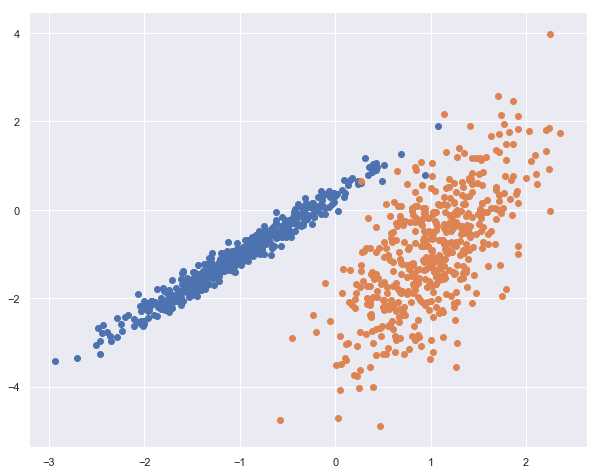

In [39]:
pyplot.figure(figsize=(10,8))
# 为每个类的样本创建散点图
for class_value in range(2):
# 获取此类的示例的行索引
    row_ix = where(y == class_value)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

一.聚类
聚类分析，即聚类，是一项无监督的机器学习任务。它包括自动发现数据中的自然分组。与监督学习（类似预测建模）不同，聚类算法只解释输入数据，并在特征空间中找到自然组或群集。

聚类技术适用于没有要预测的类，而是将实例划分为自然组的情况。
—源自：《数据挖掘页：实用机器学习工具和技术》2016年。

群集通常是特征空间中的密度区域，其中来自域的示例（观测或数据行）比其他群集更接近群集。群集可以具有作为样本或点特征空间的中心(质心)，并且可以具有边界或范围。

这些群集可能反映出在从中绘制实例的域中工作的某种机制，这种机制使某些实例彼此具有比它们与其余实例更强的相似性。
—源自：《数据挖掘页：实用机器学习工具和技术》2016年。

聚类可以作为数据分析活动提供帮助，以便了解更多关于问题域的信息，即所谓的模式发现或知识发现。例如：

该进化树可以被认为是人工聚类分析的结果；
将正常数据与异常值或异常分开可能会被认为是聚类问题；
根据自然行为将集群分开是一个集群问题，称为市场细分。
聚类还可用作特征工程的类型，其中现有的和新的示例可被映射并标记为属于数据中所标识的群集之一。虽然确实存在许多特定于群集的定量措施，但是对所识别的群集的评估是主观的，并且可能需要领域专家。通常，聚类算法在人工合成数据集上与预先定义的群集进行学术比较，预计算法会发现这些群集。

聚类是一种无监督学习技术，因此很难评估任何给定方法的输出质量。
—源自：《机器学习页：概率观点》2012。

二.聚类算法
有许多类型的聚类算法。许多算法在特征空间中的示例之间使用相似度或距离度量，以发现密集的观测区域。因此，在使用聚类算法之前，扩展数据通常是良好的实践。

聚类分析的所有目标的核心是被群集的各个对象之间的相似程度（或不同程度）的概念。聚类方法尝试根据提供给对象的相似性定义对对象进行分组。
—源自：《统计学习的要素：数据挖掘、推理和预测》，2016年

一些聚类算法要求您指定或猜测数据中要发现的群集的数量，而另一些算法要求指定观测之间的最小距离，其中示例可以被视为“关闭”或“连接”。因此，聚类分析是一个迭代过程，在该过程中，对所识别的群集的主观评估被反馈回算法配置的改变中，直到达到期望的或适当的结果。scikit-learn 库提供了一套不同的聚类算法供选择。下面列出了10种比较流行的算法：

亲和力传播
聚合聚类
BIRCH
DBSCAN
K-均值
Mini-Batch K-均值
Mean Shift
OPTICS
光谱聚类
高斯混合
每个算法都提供了一种不同的方法来应对数据中发现自然组的挑战。没有最好的聚类算法，也没有简单的方法来找到最好的算法为您的数据没有使用控制实验。在本教程中，我们将回顾如何使用来自 scikit-learn 库的这10个流行的聚类算法中的每一个。这些示例将为您复制粘贴示例并在自己的数据上测试方法提供基础。我们不会深入研究算法如何工作的理论，也不会直接比较它们。让我们深入研究一下。

三.聚类算法示例
在本节中，我们将回顾如何在 scikit-learn 中使用10个流行的聚类算法。这包括一个拟合模型的例子和可视化结果的例子。这些示例用于将粘贴复制到您自己的项目中，并将方法应用于您自己的数据。

1.库安装

首先，让我们安装库。不要跳过此步骤，因为你需要确保安装了最新版本。你可以使用 pip Python 安装程序安装 scikit-learn 存储库，如下所示：

sudo pip install scikit-learn
接下来，让我们确认已经安装了库，并且您正在使用一个现代版本。运行以下脚本以输出库版本号。

# 检查 scikit-learn 版本
import sklearn
print(sklearn.__version__)
运行该示例时，您应该看到以下版本号或更高版本。

#  代码实现

## 亲和力传播

亲和力传播包括找到一组最能概括数据的范例。

我们设计了一种名为“亲和传播”的方法，它作为两对数据点之间相似度的输入度量。在数据点之间交换实值消息，直到一组高质量的范例和相应的群集逐渐出现
—源自：《通过在数据点之间传递消息》2007。

它是通过 AffinityPropagation 类实现的，要调整的主要配置是将“ 阻尼 ”设置为0.5到1，甚至可能是“首选项”。

下面列出了完整的示例。

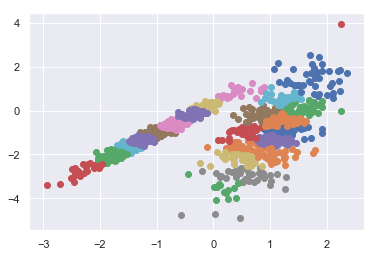

In [40]:
# 亲和力传播聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation

# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = AffinityPropagation(damping=0.9)
# 匹配模型
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

运行该示例符合训练数据集上的模型，并预测数据集中每个示例的群集。然后创建一个散点图，并由其指定的群集着色。在这种情况下，我无法取得良好的结果。

## .聚合聚类

聚合聚类涉及合并示例，直到达到所需的群集数量为止。它是层次聚类方法的更广泛类的一部分，通过 AgglomerationClustering 类实现的，主要配置是“ n _ clusters ”集，这是对数据中的群集数量的估计，例如2。下面列出了完整的示例。

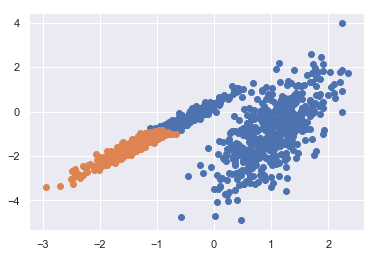

In [41]:
# 聚合聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = AgglomerativeClustering(n_clusters=2)
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

运行该示例符合训练数据集上的模型，并预测数据集中每个示例的群集。然后创建一个散点图，并由其指定的群集着色。在这种情况下，可以找到一个合理的分组。



## BIRCH

BIRCH 聚类（ BIRCH 是平衡迭代减少的缩写，聚类使用层次结构)包括构造一个树状结构，从中提取聚类质心。

BIRCH 递增地和动态地群集传入的多维度量数据点，以尝试利用可用资源（即可用内存和时间约束）产生最佳质量的聚类。
—源自：《 BIRCH ：1996年大型数据库的高效数据聚类方法》

它是通过 Birch 类实现的，主要配置是“ threshold ”和“ n _ clusters ”超参数，后者提供了群集数量的估计。下面列出了完整的示例。

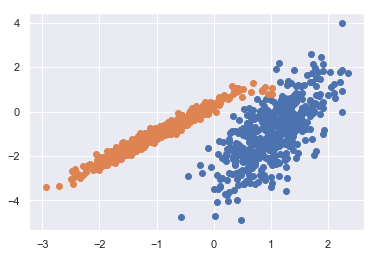

In [42]:
# birch聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch

# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = Birch(threshold=0.01, n_clusters=2)
# 适配模型
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

运行该示例符合训练数据集上的模型，并预测数据集中每个示例的群集。然后创建一个散点图，并由其指定的群集着色。在这种情况下，可以找到一个很好的分组。

## DBSCAN

DBSCAN 聚类（其中 DBSCAN 是基于密度的空间聚类的噪声应用程序）涉及在域中寻找高密度区域，并将其周围的特征空间区域扩展为群集。

…我们提出了新的聚类算法 DBSCAN 依赖于基于密度的概念的集群设计，以发现任意形状的集群。DBSCAN 只需要一个输入参数，并支持用户为其确定适当的值
-源自：《基于密度的噪声大空间数据库聚类发现算法》，1996

它是通过 DBSCAN 类实现的，主要配置是“ eps ”和“ min _ samples ”超参数。

下面列出了完整的示例。

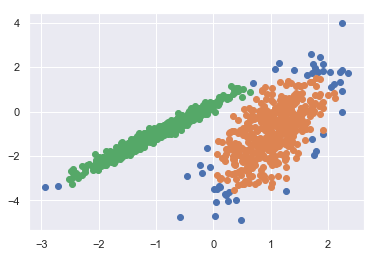

In [43]:
# dbscan 聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = DBSCAN(eps=0.30, min_samples=9)
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

## K均值

K-均值聚类可以是最常见的聚类算法，并涉及向群集分配示例，以尽量减少每个群集内的方差。

本文的主要目的是描述一种基于样本将 N 维种群划分为 k 个集合的过程。这个叫做“ K-均值”的过程似乎给出了在类内方差意义上相当有效的分区。
-源自：《关于多元观测的分类和分析的一些方法》1967年。

它是通过 K-均值类实现的，要优化的主要配置是“ n _ clusters ”超参数设置为数据中估计的群集数量。下面列出了完整的示例。

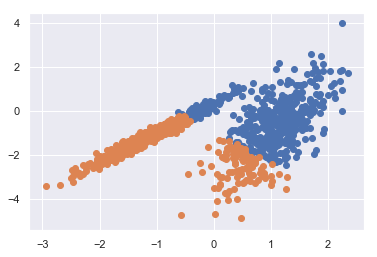

In [44]:
# k-means 聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = KMeans(n_clusters=2)
# 模型拟合
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

运行该示例符合训练数据集上的模型，并预测数据集中每个示例的群集。然后创建一个散点图，并由其指定的群集着色。在这种情况下，可以找到一个合理的分组，尽管每个维度中的不等等方差使得该方法不太适合该数据集。

## Mini-Batch K-均值
Mini-Batch K-均值是 K-均值的修改版本，它使用小批量的样本而不是整个数据集对群集质心进行更新，这可以使大数据集的更新速度更快，并且可能对统计噪声更健壮。

...我们建议使用 k-均值聚类的迷你批量优化。与经典批处理算法相比，这降低了计算成本的数量级，同时提供了比在线随机梯度下降更好的解决方案。
—源自：《Web-Scale K-均值聚类》2010

它是通过 MiniBatchKMeans 类实现的，要优化的主配置是“ n _ clusters ”超参数，设置为数据中估计的群集数量。下面列出了完整的示例。

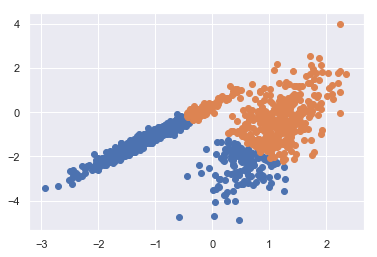

In [45]:
# mini-batch k均值聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans

# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = MiniBatchKMeans(n_clusters=2)
# 模型拟合
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

运行该示例符合训练数据集上的模型，并预测数据集中每个示例的群集。然后创建一个散点图，并由其指定的群集着色。在这种情况下，会找到与标准 K-均值算法相当的结果。

## 均值漂移聚类

均值漂移聚类涉及到根据特征空间中的实例密度来寻找和调整质心。

对离散数据证明了递推平均移位程序收敛到最接近驻点的基础密度函数，从而证明了它在检测密度模式中的应用。
—源自：《Mean Shift ：面向特征空间分析的稳健方法》，2002

它是通过 MeanShift 类实现的，主要配置是“带宽”超参数。下面列出了完整的示例。

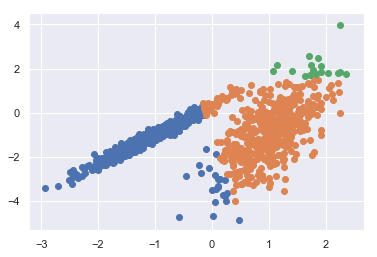

In [46]:
# 均值漂移聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift

# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = MeanShift()
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

运行该示例符合训练数据集上的模型，并预测数据集中每个示例的群集。然后创建一个散点图，并由其指定的群集着色。在这种情况下，可以在数据中找到一组合理的群集。

## OPTICS

OPTICS 聚类（ OPTICS 短于订购点数以标识聚类结构）是上述 DBSCAN 的修改版本。

我们为聚类分析引入了一种新的算法，它不会显式地生成一个数据集的聚类；而是创建表示其基于密度的聚类结构的数据库的增强排序。此群集排序包含相当于密度聚类的信息，该信息对应于范围广泛的参数设置。
—源自：《OPTICS ：排序点以标识聚类结构》，1999

它是通过 OPTICS 类实现的，主要配置是“ eps ”和“ min _ samples ”超参数。下面列出了完整的示例。

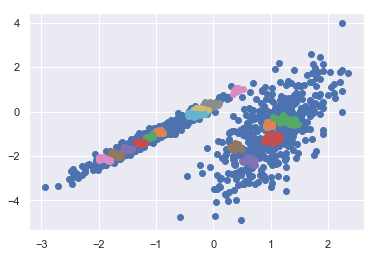

In [47]:

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS

# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = OPTICS(eps=0.8, min_samples=10)
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

运行该示例符合训练数据集上的模型，并预测数据集中每个示例的群集。然后创建一个散点图，并由其指定的群集着色。在这种情况下，我无法在此数据集上获得合理的结果。

## 光谱聚类

光谱聚类是一类通用的聚类方法，取自线性线性代数。

最近在许多领域出现的一个有希望的替代方案是使用聚类的光谱方法。这里，使用从点之间的距离导出的矩阵的顶部特征向量。
—源自：《关于光谱聚类：分析和算法》，2002年

它是通过 Spectral 聚类类实现的，而主要的 Spectral 聚类是一个由聚类方法组成的通用类，取自线性线性代数。要优化的是“ n _ clusters ”超参数，用于指定数据中的估计群集数量。下面列出了完整的示例。

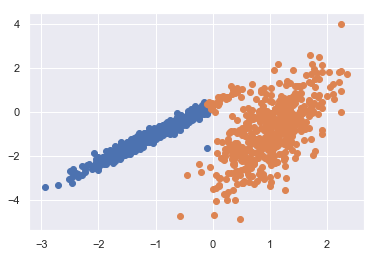

In [48]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering

# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = SpectralClustering(n_clusters=2)
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

运行该示例符合训练数据集上的模型，并预测数据集中每个示例的群集。然后创建一个散点图，并由其指定的群集着色。

在这种情况下，找到了合理的集群。

## 高斯混合模型

高斯混合模型总结了一个多变量概率密度函数，顾名思义就是混合了高斯概率分布。它是通过 Gaussian Mixture 类实现的，要优化的主要配置是“ n _ clusters ”超参数，用于指定数据中估计的群集数量。下面列出了完整的示例。

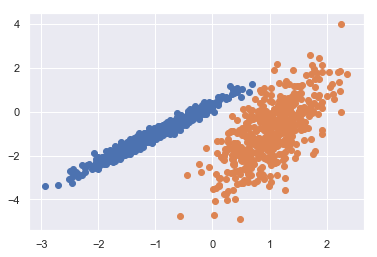

In [49]:
# 高斯混合模型
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = GaussianMixture(n_components=2)
# 模型拟合
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

运行该示例符合训练数据集上的模型，并预测数据集中每个示例的群集。然后创建一个散点图，并由其指定的群集着色。在这种情况下，我们可以看到群集被完美地识别。这并不奇怪，因为数据集是作为 Gaussian 的混合生成的。